In [16]:
import geopandas as gpd
import numpy as np
import pandas as pd
import json
import os
import seaborn as sns
 
import sys 
sys.path.insert(0, "../src")
from BrusselsMap import BrusselsMap
from GeoJsonHandler import GeoJsonHandler
from OSMGeoJsonHandler import OSMGeoJsonHandler

pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
r_path = r"../data/osm/overpass-turbo/sport.geojson"
path = os.path.join(os.getcwd(), r_path)

sport = OSMGeoJsonHandler(r_path, feature_type='sport')

In [4]:
sport.gdf.head()

,ID,TYPE,NAME,geometry,AREA,LAT,LON
0,9068600,way,NaN,"POLYGON ((4.39660 50.85997, 4.39622 50.85976, ...",0.002278,50.859647,4.396699
1,9644004,way,NaN,"POLYGON ((4.39788 50.88069, 4.39811 50.88009, ...",0.007471,50.880499,4.398735
2,9644012,way,NaN,"POLYGON ((4.40029 50.88142, 4.40046 50.88051, ...",0.007379,50.881003,4.400881
3,9778518,way,NaN,"POLYGON ((4.30254 50.84030, 4.30269 50.84000, ...",0.001208,50.840196,4.302842
4,9778529,way,NaN,"POLYGON ((4.30317 50.84043, 4.30333 50.84013, ...",0.000535,50.840301,4.303347


## Assign neighborhoods

In [5]:
#Load geodata
r_path = r"../data/final_data/sector.json"
path = os.path.join(os.getcwd(), r_path)
sectors = GeoJsonHandler(path, "NAME_FRE")

In [6]:
sport.assign_ngh(sectors)

  0%|                                                                                                                                                   | 0/808 [00:00<?, ?it/s]C:\Users\vic_t\Anaconda3\envs\mfe_env\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 808/808 [01:01<00:00, 13.24it/s]


In [13]:
sport.gdf['AMENITY'] = 'sport'
sport.gdf = sport.gdf[['ID', 'TYPE', 'NAME', 'AMENITY', 'geometry', 'AREA', 'LAT', 'LON', 'NAME_FRE']]
sport.gdf.head()

,ID,TYPE,NAME,AMENITY,geometry,AREA,LAT,LON,NAME_FRE
0,9068600,way,NaN,sport,"POLYGON ((4.39660 50.85997, 4.39622 50.85976, ...",0.002278,50.859647,4.396699,GARE JOSAPHAT
1,9644004,way,NaN,sport,"POLYGON ((4.39788 50.88069, 4.39811 50.88009, ...",0.007471,50.880499,4.398735,PAIX
2,9644012,way,NaN,sport,"POLYGON ((4.40029 50.88142, 4.40046 50.88051, ...",0.007379,50.881003,4.400881,PAIX
3,9778518,way,NaN,sport,"POLYGON ((4.30254 50.84030, 4.30269 50.84000, ...",0.001208,50.840196,4.302842,BUFFON
4,9778529,way,NaN,sport,"POLYGON ((4.30317 50.84043, 4.30333 50.84013, ...",0.000535,50.840301,4.303347,BUFFON


### We need to remove outliers as huge areas will strongly impact our results

In [30]:
np.sqrt(0.01 * 1e6)

100.0

In [34]:
#Let's fix the maximal size of sport amenities to 5000 m^2 
sport.gdf.loc[sport.gdf['AREA'] > 0.005, ['AREA']] = 0.005

<AxesSubplot:xlabel='AREA', ylabel='Count'>

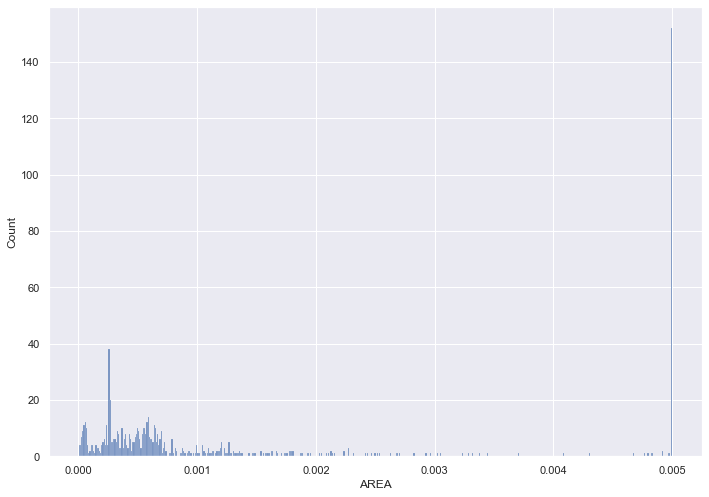

In [35]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(sport.gdf, x='AREA', bins=500)

In [36]:
r_path = r"../data/final_data/osm/sport.csv"
path = os.path.join(os.getcwd(), r_path)

sport.gdf.to_csv(path, sep=',', encoding='utf-8-sig', index=False, chunksize=10000)